# Triplet instability

In [1]:
import veloxchem as vlx
import matplotlib.pyplot as plt
import numpy as np

* Warning * Environment variable OMP_NUM_THREADS not set.
* Warning * Setting OMP_NUM_THREADS to 4.


In [2]:
beryllium_xyz = """1

Be       0.00000000    0.00000000    0.00000000
"""

In [33]:
molecule = vlx.Molecule.from_xyz_string(beryllium_xyz)
basis = vlx.MolecularBasis.read(molecule, "6-31G")

scf_drv = vlx.ScfUnrestrictedDriver()
#scf_drv.xcfun = 'b3lyp'
scf_results = scf_drv.compute(molecule, basis)
lres_drv = vlx.LinearResponseEigenSolver()
#lres_drv.xcfun = 'b3lyp'
rsp_settings = {"nstates": 2}
lres_drv.update_settings(rsp_settings)
lres_out = lres_drv.compute(molecule, basis, scf_results)

* Info * Reading basis set from file: /home/thomas/miniconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/6-31G
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: 6-31G                                                                               
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
               

In [34]:
print(scf_results["E_alpha"])
print(scf_results["E_beta"])
print(lres_out['eigenvalues'])

[-4.70689069 -0.30129541  0.08243533  0.08243533  0.08243533  0.43975433
  0.464931    0.464931    0.464931  ]
[-4.70689069 -0.30129541  0.08243533  0.08243533  0.08243533  0.43975433
  0.464931    0.464931    0.464931  ]
[0.18956764 0.18956764]


* Info * Processing Fock builds... (batch size: 56)                                                                       
* Info *   batch 1/1                                                                                                      
-0.15849091308893137


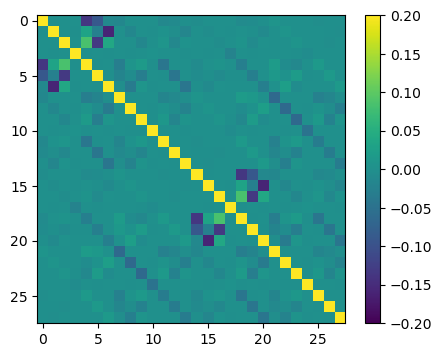

In [30]:
lres_drv = vlx.LinearResponseEigenSolver()
E2 = lres_drv.get_e2(molecule, basis, scf_results)
print(np.min(E2))
plt.figure(figsize=(5, 4))
plt.imshow(E2,vmin=-0.2,vmax=0.2)
plt.colorbar()
plt.show()

In [27]:
lres_drv.update_settings?

Signature: lres_drv.update_settings(rsp_dict, method_dict=None)
Docstring:
Updates response and method settings in linear response eigensolver.

:param rsp_dict:
    The dictionary of response input.
:param method_dict:
    The dictionary of method settings.
File:      ~/miniconda3/envs/echem/lib/python3.11/site-packages/veloxchem/lreigensolver.py
Type:      method